# Clean Glass Data:

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
# Read the csv file
filename = 'glass.csv'
df = pd.read_csv(filename)

# Convert the dataframe to numpy array
raw_data = df.values

# Naming the attributes since they are in a different csv file
attribute_names = ['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type'] 

In [4]:
# Removing the ID attribute
raw_data = raw_data[:,1:]

cols = range(0,10) # 10 columns
data = raw_data[:,cols] # defining the data matrix

In [5]:
# Standardize the data, execept last column which is the type of glass
for i in range(0,8):
    data[:,i] = (data[:,i] - data[:,i].mean()) / data[:,i].std()

In [6]:
# Using the one-out-of-K encoding for the last column

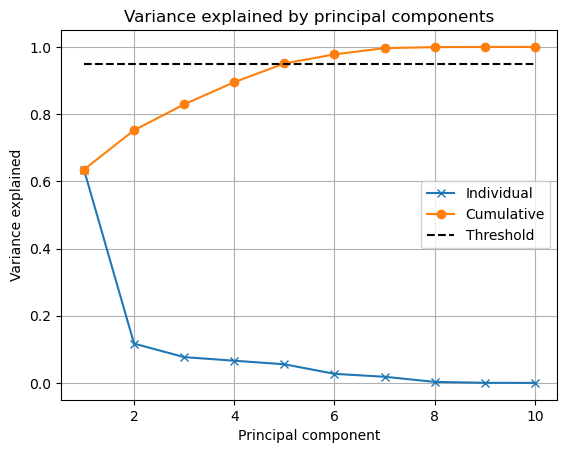

In [12]:
# PCA using SVD
from scipy.linalg import svd
import matplotlib.pyplot as plt

U,S,V = svd(data,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()